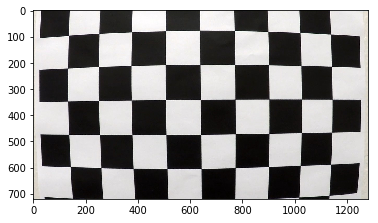

In [1]:
# Camera Calibration

## Import Libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# Read in a calibration image 
img = mpimg.imread('camera_cal/calibration1.jpg')
plt.imshow(img)

In [2]:
# Compute the Camera Matrix
import glob

nx = 9
ny = 6

objpoints = []
imgpoints = []

objp = np.zeros((nx*ny,3), np.float32)
objp[:,:2] = np.mgrid[0:nx,0:ny].T.reshape(-1,2)

fnames = glob.glob("camera_cal/calibration*.jpg")

# Find corners/object and image points of all test images in source directory
for fname in fnames:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
 
    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None)

    # If found, add object points, image points
    if ret == True:
        print(fname)
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
    
# Use the object and image points to calibrate the camera and compute the camera matrix and distortion coefficients
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[:2],None,None)

camera_cal\calibration10.jpg
camera_cal\calibration11.jpg
camera_cal\calibration12.jpg
camera_cal\calibration13.jpg
camera_cal\calibration14.jpg
camera_cal\calibration15.jpg
camera_cal\calibration16.jpg
camera_cal\calibration17.jpg
camera_cal\calibration18.jpg
camera_cal\calibration19.jpg
camera_cal\calibration2.jpg
camera_cal\calibration20.jpg
camera_cal\calibration3.jpg
camera_cal\calibration6.jpg
camera_cal\calibration7.jpg
camera_cal\calibration8.jpg
camera_cal\calibration9.jpg


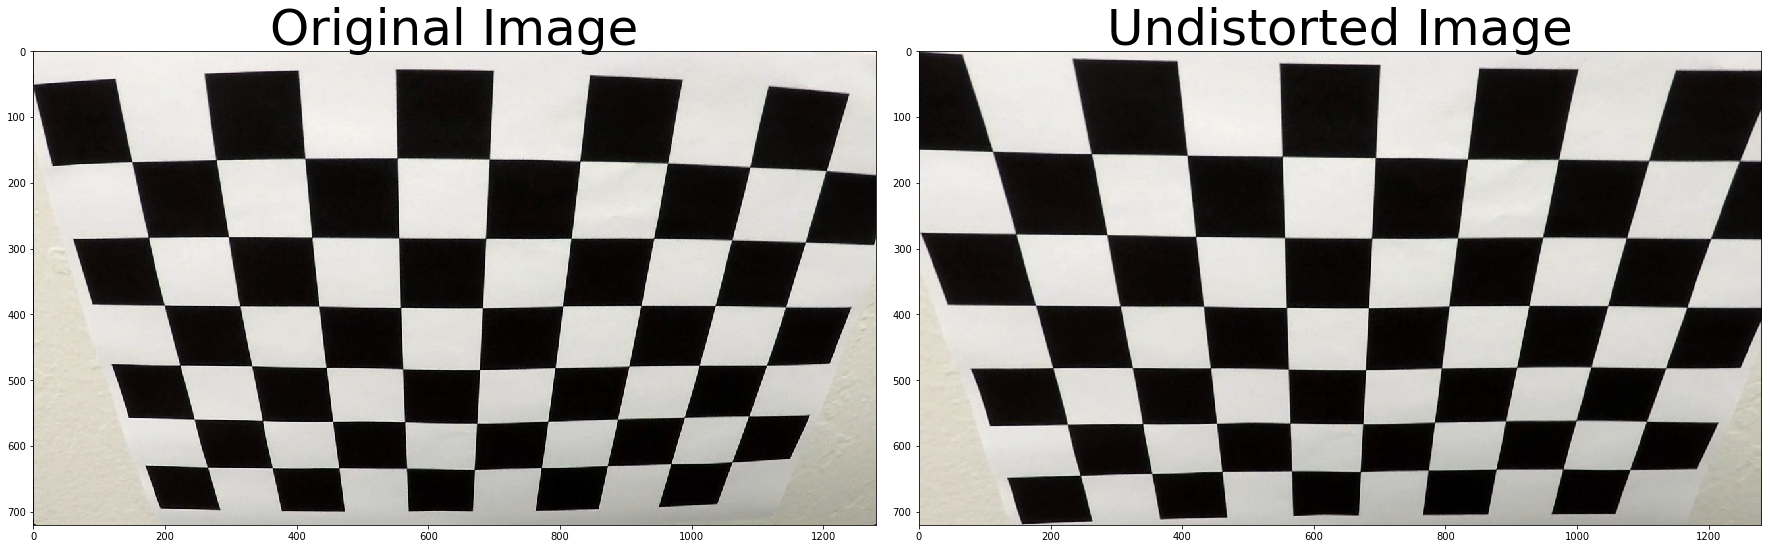

In [3]:
# Plot an original image with a distorted image for testing
img = mpimg.imread('camera_cal/calibration2.jpg')
undistorted = cv2.undistort(img, mtx, dist, None, mtx)

# Plot the original and undistorted images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(undistorted)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

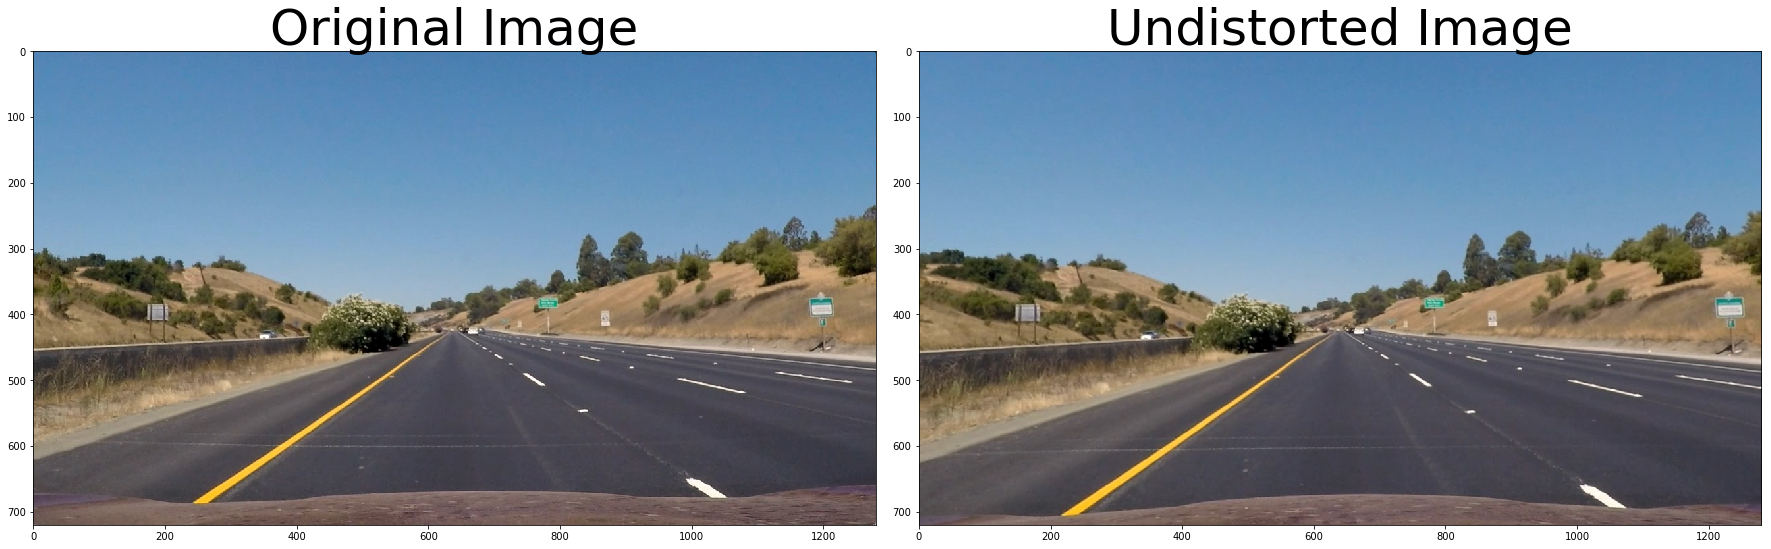

In [4]:
# Create Function to Undistort and Calibrate Image 
img = mpimg.imread('test_images/straight_lines1.jpg')

def cal_undistort(img, objpoints, imgpoints):
    # Use cv2.calibrateCamera() and cv2.undistort()
    # Note: This will calibrate and undistort image
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (9,6), None)
    img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    return undist

undistorted = cal_undistort(img, objpoints, imgpoints)

# Plot the original and undistorted images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(undistorted)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

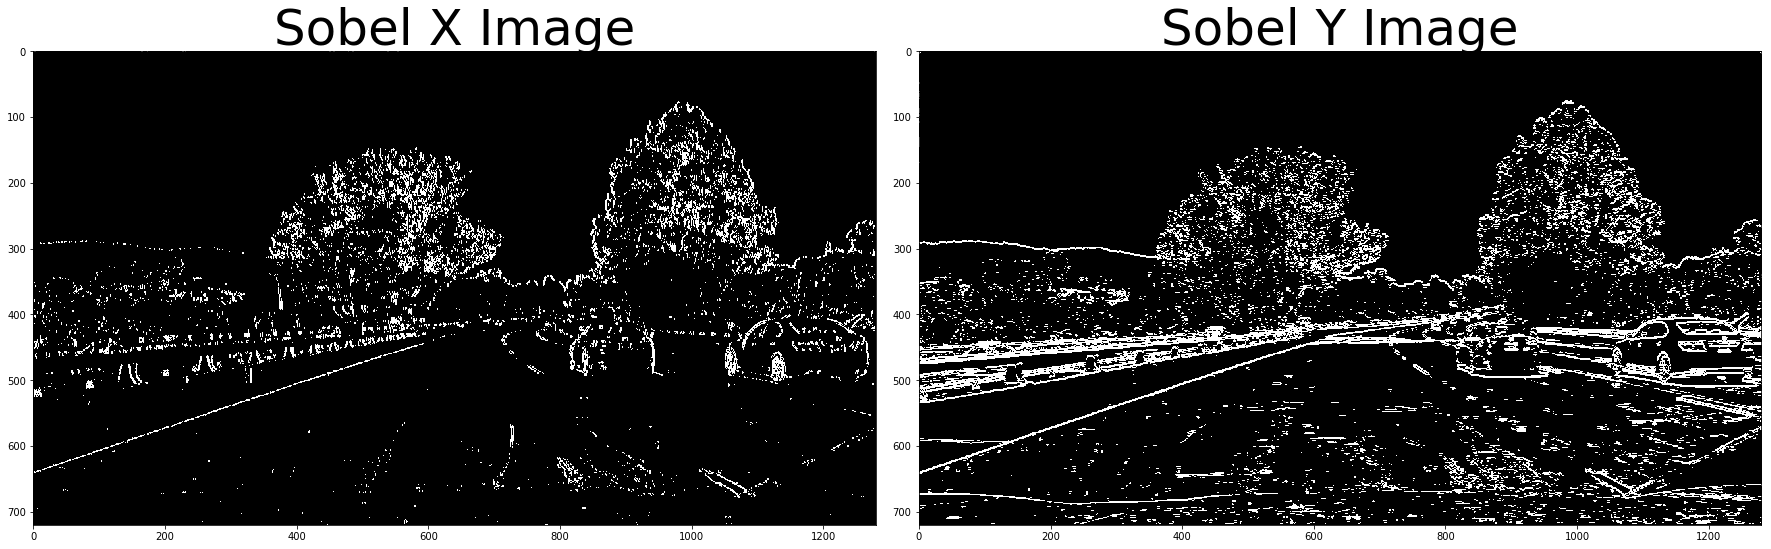

In [5]:
# Define a function that takes an image, gradient orientation,
# and threshold min / max values.
def abs_sobel_thresh(img, orient='x', sobel_kernel=3, thresh=(0,255)):
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Apply Sobel and take the derivative in x or y given orient = 'x' or 'y'
    if orient == 'x':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 1, 0))
    if orient == 'y':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 0, 1))
    # Take the absolute value of the derivative or gradient
    abs_sobelx = np.absolute(abs_sobel)
    # Scale to 8-bit (0 - 255) then convert to type = np.uint8
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    # Create a mask of 1's where the scaled gradient magnitude 
    # is > thresh_min and < thresh_max
    binary_output = np.zeros_like(scaled_sobel)
    binary_output[(scaled_sobel >= thresh[0]) & (scaled_sobel <= thresh[1])] = 1
    # Return mask as binary_output image
    return binary_output

# Read in an image
img = mpimg.imread('test_images/test1.jpg')

# Apply function
sobelx = abs_sobel_thresh(img, orient='x',sobel_kernel=3, thresh=(25, 170))
sobely = abs_sobel_thresh(img, orient='y',sobel_kernel=3, thresh=(20, 255))

# Plot the original and undistorted images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(sobelx, cmap='gray')
ax1.set_title('Sobel X Image', fontsize=50)
ax2.imshow(sobely, cmap='gray')
ax2.set_title('Sobel Y Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

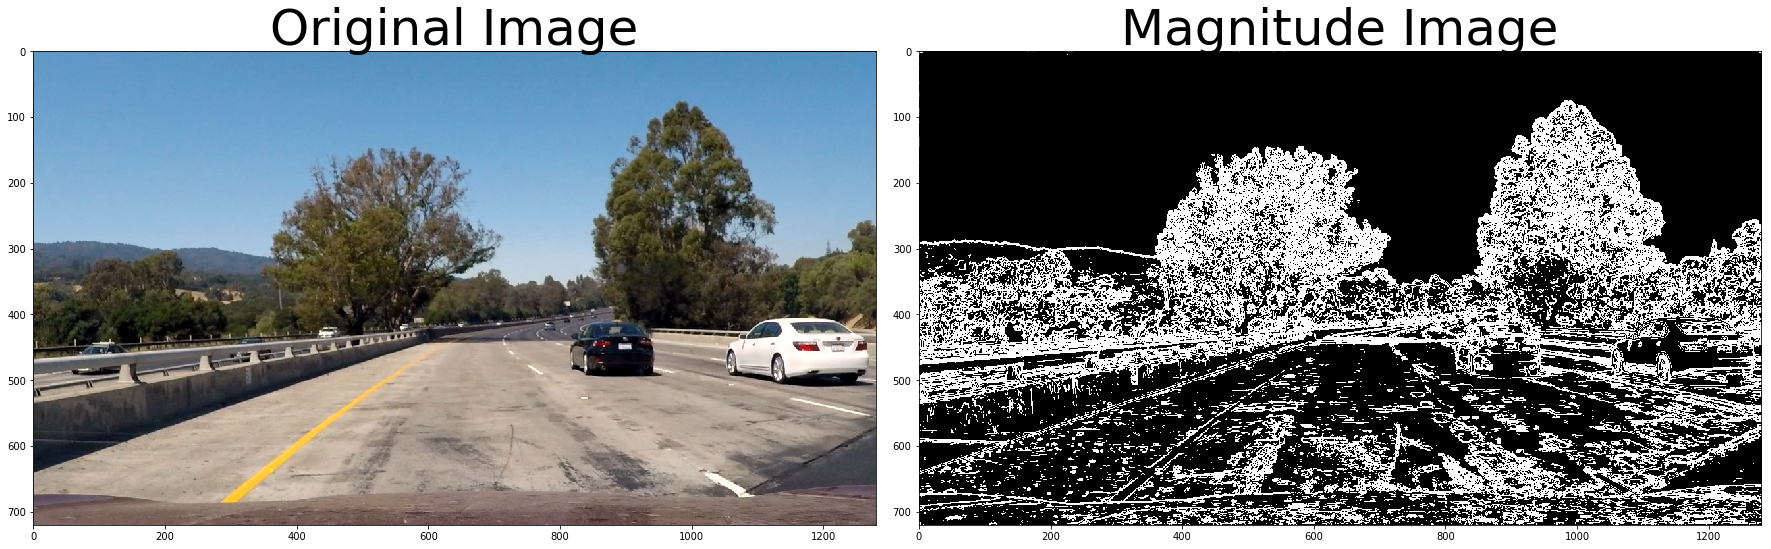

In [6]:
# Define a function to return the magnitude of the gradient
# for a given sobel kernel size and threshold values
def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Take the gradient in x and y separately
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # Calculate the magnitude 
    gradmag = np.sqrt(sobelx**2 + sobely**2)
    # Rescale to 8 bit
    scale_factor = np.max(gradmag)/255 
    gradmag = (gradmag/scale_factor).astype(np.uint8) 
    # Create a binary mask where mag thresholds are met
    binary_output = np.zeros_like(gradmag)
    binary_output[(gradmag >= mag_thresh[0]) & (gradmag <= mag_thresh[1])] = 1

    # Return the binary image
    return binary_output

# Read in an image
img = mpimg.imread('test_images/test1.jpg')

# Run the function
magnitude = mag_thresh(img, sobel_kernel=3, mag_thresh=(10,100))

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(magnitude, cmap='gray')
ax2.set_title('Magnitude Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

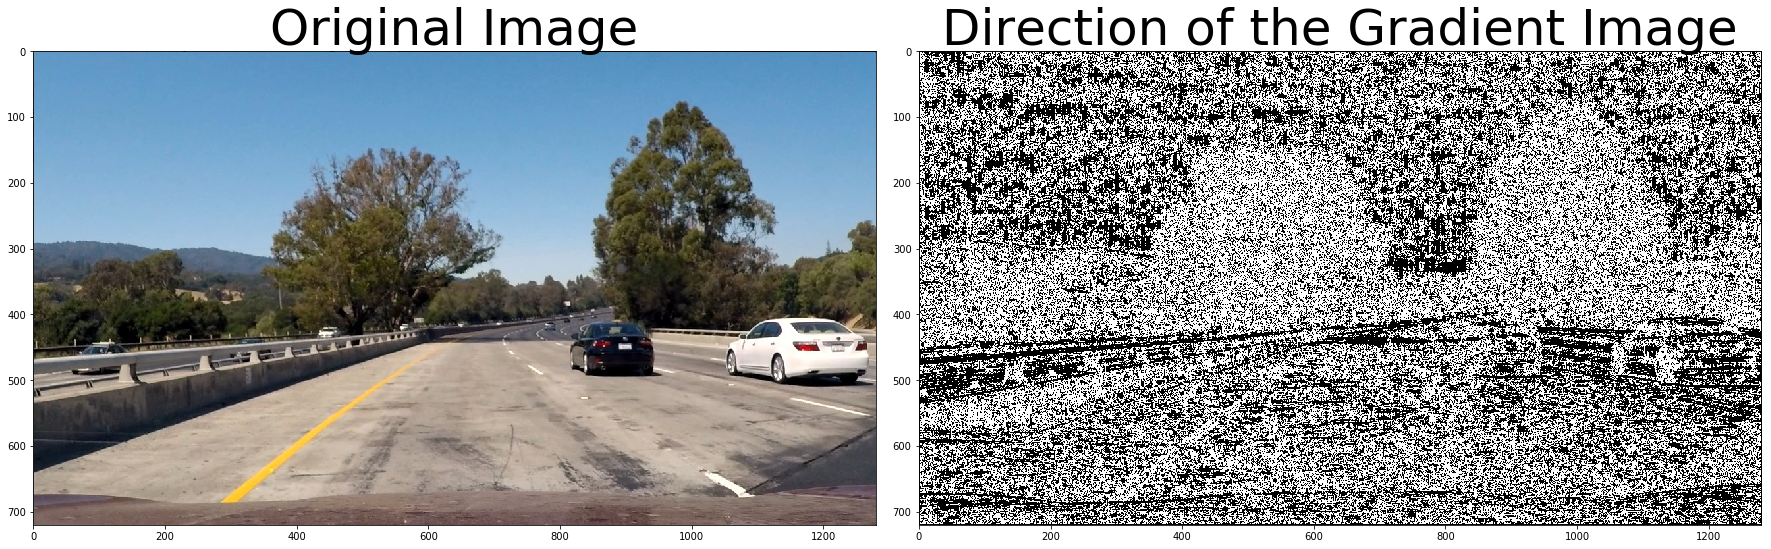

In [7]:
# Define a function that applies Sobel x and y, then computes the direction of the gradient and applies a threshold.
def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    # Grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Calculate the x and y gradients
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # Take the absolute value of the gradient direction, 
    # apply a threshold, and create a binary image result
    absgraddir = np.arctan2(np.absolute(sobely), np.absolute(sobelx))
    binary_output =  np.zeros_like(absgraddir)
    binary_output[(absgraddir >= thresh[0]) & (absgraddir <= thresh[1])] = 1

    # Return the binary image
    return binary_output

# Read in an image
img = mpimg.imread('test_images/test1.jpg')

# Run the function
direction = dir_threshold(img, sobel_kernel=3, thresh=(0.1, 1.2))

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(direction, cmap='gray')
ax2.set_title('Direction of the Gradient Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

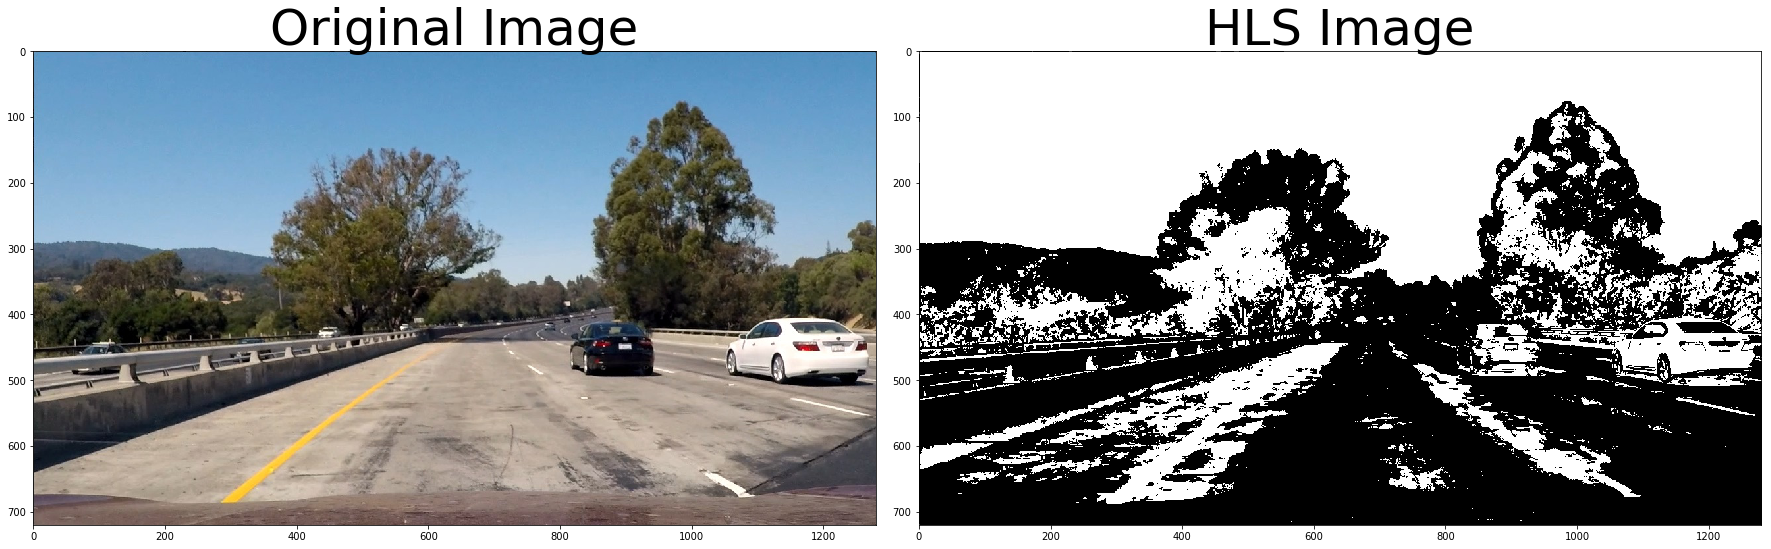

In [8]:
# Define a function that thresholds the S-channel of HLS
def hls_select(img, thresh=(0, 255)):
    s_channel = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)[:,:,2]
    
    l_channel = cv2.cvtColor(img, cv2.COLOR_BGR2LUV)[:,:,0]


    # Threshold color channel
    s_thresh_min = 65
    s_thresh_max = 255
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh_min) & (s_channel <= s_thresh_max)] = 1
    
    
    l_thresh_min = 185
    l_thresh_max = 255
    l_binary = np.zeros_like(l_channel)
    l_binary[(l_channel >= l_thresh_min) & (l_channel <= l_thresh_max)] = 1

    #color_binary = np.dstack((u_binary, s_binary, l_binary))
    
    combined_binary = np.zeros_like(s_binary)
    combined_binary[(l_binary == 1) | (s_binary == 1)] = 1
    return combined_binary

# Read in an image
img = mpimg.imread('test_images/test1.jpg')

# Run the function
hls_binary = hls_select(img)

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(hls_binary, cmap='gray')
ax2.set_title('HLS Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

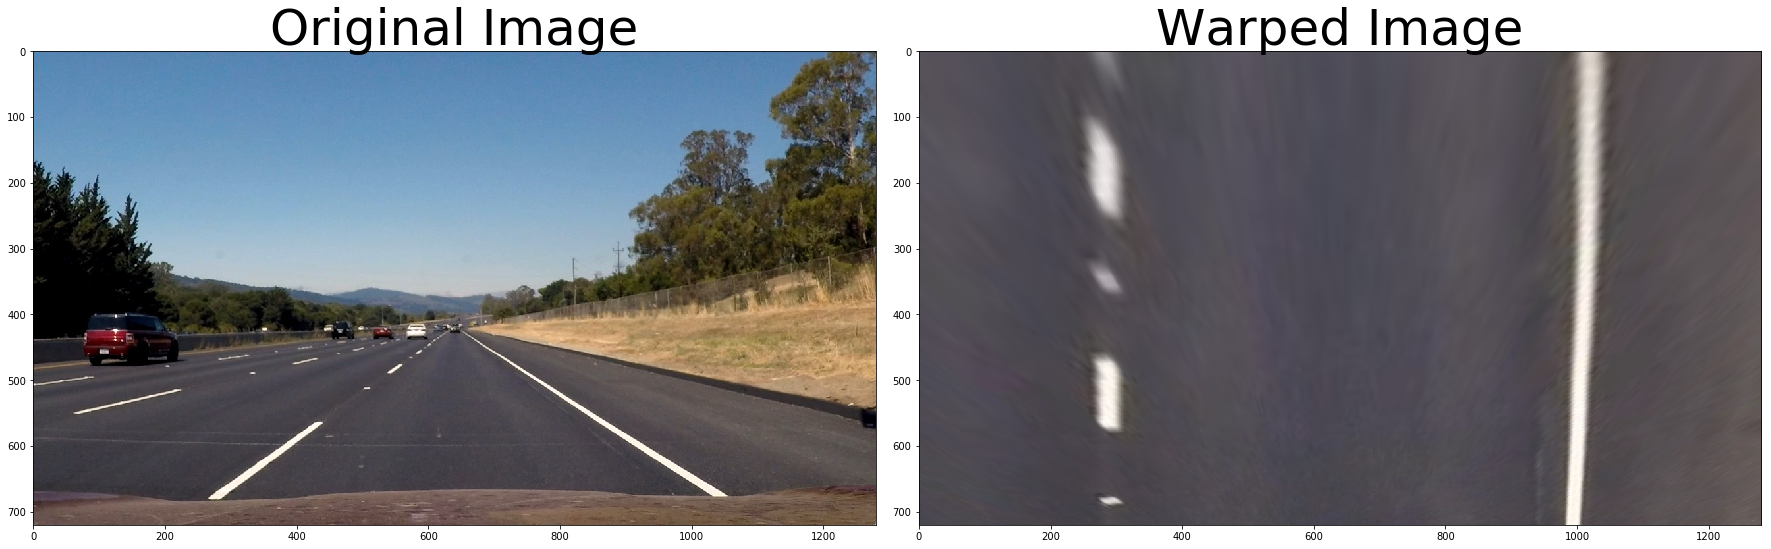

In [9]:
src_bottom_left = [500,525] 
src_bottom_right = [800, 550]
src_top_left = [600, 450]
src_top_right = [675, 450]

src = np.float32([src_bottom_left,src_bottom_right,src_top_right,src_top_left])

dst_bottom_left = [320,720] 
dst_bottom_right = [920, 720]
dst_top_left = [320, 1]
dst_top_right = [920, 1]

dst = np.float32([dst_bottom_left,dst_bottom_right,dst_top_right,dst_top_left])

M = cv2.getPerspectiveTransform(src, dst)
M_inv = cv2.getPerspectiveTransform(dst, src)

def perspective_transform(img, M):
    warped = cv2.warpPerspective(img, M, dsize = (img.shape[1],img.shape[0]), flags = cv2.INTER_LINEAR)
    return warped

# Read in an image
img = mpimg.imread('test_images/straight_lines2.jpg')

# Run the function
warped = perspective_transform(img, M)

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(warped, cmap='gray')
ax2.set_title('Warped Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [10]:
def pipeline(img):
    img = cv2.undistort(img, mtx, dist, None, mtx)
    warped = perspective_transform(img, M)
    gray = cv2.cvtColor(warped, cv2.COLOR_BGR2GRAY)
    gradx = abs_sobel_thresh(warped, orient='x', sobel_kernel=3, thresh=(10, 230))
    grady = abs_sobel_thresh(warped, orient='y', sobel_kernel=3, thresh=(10, 230))
    mag_binary = mag_thresh(warped, sobel_kernel=3, mag_thresh=(30, 150))
    dir_binary = dir_threshold(warped, sobel_kernel=3, thresh=(0.7, 1.3))
    hls_binary = hls_select(warped)
    combined = np.zeros_like(dir_binary)
    combined[((gradx == 1) & (hls_binary == 1)) | ((mag_binary == 1) & (dir_binary == 1))] = 1
    
    return combined

FileNotFoundError: [Errno 2] No such file or directory: 'output_images/straight_lines1.jpg'

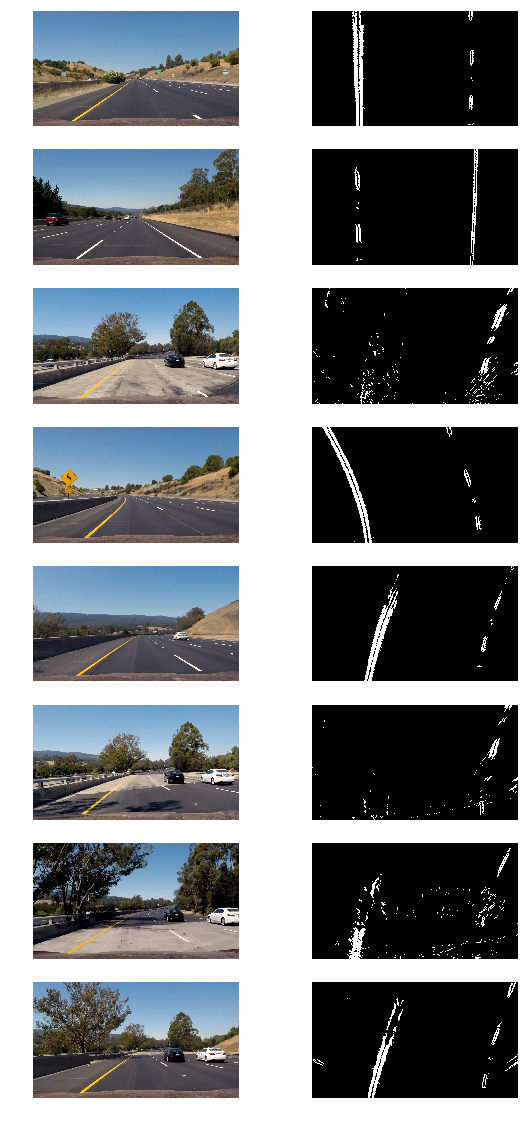

In [11]:
import os

# Make a list of example images
images = glob.glob('./test_images/*.jpg')
                                          
# Set up plot
fig, axs = plt.subplots(len(images),2, figsize=(10, 20))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
                  
# Apply pipeline to all test images and plot the images
i = 0
for image in images:
    img = cv2.imread(image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    binary_warped = pipeline(img)
    axs[i].imshow(img)
    axs[i].axis('off')
    i += 1
    axs[i].imshow(binary_warped, cmap='gray')
    axs[i].axis('off')
    i += 1

# Save binary images to output_images directory
imgfiles = os.listdir("test_images/")
for i in imgfiles: 
    image = mpimg.imread('test_images/' + i)
    test = pipeline(image)
    plt.imsave('output_images/' +i, test) 

In [ ]:
# Read in a thresholded image
warped = binary_warped
# window settings
window_width = 50 
window_height = 80 # Break image into 9 vertical layers since image height is 720
margin = 100 # How much to slide left and right for searching

def window_mask(width, height, img_ref, center,level):
    output = np.zeros_like(img_ref)
    output[int(img_ref.shape[0]-(level+1)*height):int(img_ref.shape[0]-level*height),max(0,int(center-width/2)):min(int(center+width/2),img_ref.shape[1])] = 1
    return output

def find_window_centroids(image, window_width, window_height, margin):
    
    window_centroids = [] # Store the (left,right) window centroid positions per level
    window = np.ones(window_width) # Create our window template that we will use for convolutions
    
    # First find the two starting positions for the left and right lane by using np.sum to get the vertical image slice
    # and then np.convolve the vertical image slice with the window template 
    
    # Sum quarter bottom of image to get slice, could use a different ratio
    l_sum = np.sum(warped[int(3*warped.shape[0]/4):,:int(warped.shape[1]/2)], axis=0)
    l_center = np.argmax(np.convolve(window,l_sum))-window_width/2
    r_sum = np.sum(warped[int(3*warped.shape[0]/4):,int(warped.shape[1]/2):], axis=0)
    r_center = np.argmax(np.convolve(window,r_sum))-window_width/2+int(warped.shape[1]/2)
    
    # Add what we found for the first layer
    window_centroids.append((l_center,r_center))
    
    # Go through each layer looking for max pixel locations
    for level in range(1,(int)(warped.shape[0]/window_height)):
        # convolve the window into the vertical slice of the image
        image_layer = np.sum(warped[int(warped.shape[0]-(level+1)*window_height):int(warped.shape[0]-level*window_height),:], axis=0)
        conv_signal = np.convolve(window, image_layer)
        # Find the best left centroid by using past left center as a reference
        # Use window_width/2 as offset because convolution signal reference is at right side of window, not center of window
        offset = window_width/2
        l_min_index = int(max(l_center+offset-margin,0))
        l_max_index = int(min(l_center+offset+margin,warped.shape[1]))
        l_center = np.argmax(conv_signal[l_min_index:l_max_index])+l_min_index-offset
        # Find the best right centroid by using past right center as a reference
        r_min_index = int(max(r_center+offset-margin,0))
        r_max_index = int(min(r_center+offset+margin,warped.shape[1]))
        r_center = np.argmax(conv_signal[r_min_index:r_max_index])+r_min_index-offset
        # Add what we found for that layer
        window_centroids.append((l_center,r_center))

    return window_centroids

window_centroids = find_window_centroids(warped, window_width, window_height, margin)

# If we found any window centers
if len(window_centroids) > 0:

    # Points used to draw all the left and right windows
    l_points = np.zeros_like(warped)
    r_points = np.zeros_like(warped)

    # Go through each level and draw the windows 	
    for level in range(0,len(window_centroids)):
        # Window_mask is a function to draw window areas
        l_mask = window_mask(window_width,window_height,warped,window_centroids[level][0],level)
        r_mask = window_mask(window_width,window_height,warped,window_centroids[level][1],level)
        # Add graphic points from window mask here to total pixels found 
        l_points[(l_points == 255) | ((l_mask == 1) ) ] = 255
        r_points[(r_points == 255) | ((r_mask == 1) ) ] = 255

        # Draw the results
        template = np.array(r_points+l_points,np.uint8) # add both left and right window pixels together
        zero_channel = np.zeros_like(template) # create a zero color channel
        template = np.array(cv2.merge((zero_channel,template,zero_channel)),np.uint8) # make window pixels green
        warpage = np.array(cv2.merge((warped,warped,warped)),np.uint8) # making the original road pixels 3 color channels
        output = cv2.addWeighted(warpage, 1, template, 0.5, 0.0) # overlay the orignal road image with window results
 
 # If no window centers found, just display orginal road image
else:
    output = np.array(cv2.merge((warped,warped,warped)),np.uint8)

# Display the final results
plt.imshow(output)
plt.title('window fitting results')
plt.show()

In [ ]:
combined = binary_warped

def histogram_pixel_peaks(combined):
    # Assuming you have created a warped binary image called "combined"
    # Take a histogram of the bottom half of the image
    histogram = np.sum(combined[combined.shape[0]//2:,:], axis=0)
    # Create an output image to draw on and  visualize the result
    out_img = np.dstack((combined, combined, combined))*255
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram.shape[0]/2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint
    #print(leftx_base, rightx_base)
    # Choose the number of sliding windows
    nwindows = 9
    # Set height of windows
    window_height = np.int(combined.shape[0]/nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = combined.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated for each window
    leftx_current = leftx_base
    rightx_current = rightx_base
    # Set the width of the windows +/- margin
    margin = 80
    # Set minimum number of pixels found to recenter window
    minpix = 40
    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = combined.shape[0] - np.int((window+1)*window_height)
        win_y_high = combined.shape[0] - np.int(window*window_height)
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        # Draw the windows on the visualization image
        cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),(0,255,0), 2) 
        cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),(0,255,0), 2) 
        # Identify the nonzero pixels in x and y within the window
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xleft_low) & (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xright_low) & (nonzerox < win_xright_high)).nonzero()[0]
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

    # Concatenate the arrays of indices
    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds] 

    return leftx, lefty, rightx, righty, out_img

leftx, lefty, rightx, righty, out_img = histogram_pixel_peaks(combined)

# Fit a second order polynomial to each
left_fit = np.polyfit(lefty, leftx, 2)
right_fit = np.polyfit(righty, rightx, 2)

In [ ]:
def curvature(x1,y1,x2,y2,x3,y3):
    
    m1 = (y2-y1)/(x2-x1)
    m2 = (y3-y2)/(x3-x2)
    
    xc = (m1*m2*(y1-y3)+m2*(x1+x2)-m1*(x2+x3))/(2*(m2-m1))
    yc = -(xc-(x1+x2)/2)/m1+(y1+y2)/2
    
    Radius = np.sqrt((x2-xc)*(x2-xc)+(y2-yc)*(y2-yc))
    
    return m1, m2, xc, yc, Radius


m1, m2, xc, yc, R = curvature(1,1,2,3,3,8)

# pixels are converted to meters in the below pipeline method

In [ ]:
def pipeline(img):
    ksize = 3
    img = cv2.undistort(img, mtx, dist, None, mtx)
    img = cv2.resize(img, (720, 405))
    warped = perspective_transform(img, M)
    gray = cv2.cvtColor(warped, cv2.COLOR_BGR2GRAY)
    gradx = abs_sobel_thresh(warped, orient='x', sobel_kernel=3, thresh=(10, 255))
    grady = abs_sobel_thresh(warped, orient='y', sobel_kernel=3, thresh=(1, 255))
    mag_binary = mag_thresh(warped, sobel_kernel=ksize, mag_thresh=(30, 255))
    dir_binary = dir_threshold(warped, sobel_kernel=ksize, thresh=(0, 1.7))
    hls_binary = hls_select(warped)
    combined = np.zeros_like(dir_binary)
    combined[((grady == 1) & (hls_binary == 1)) | ((mag_binary == 1) & (dir_binary == 1))] = 1
    
    #leftx, lefty, rightx, righty, window_centroids = find_window_centroids(combined, window_width, window_number, margin)
    
          
    leftx, lefty, rightx, righty, out_img = histogram_pixel_peaks(combined)
        
    yvals = np.linspace(0, combined.shape[0], num=combined.shape[0])

    # Fit a second order polynomial to each lane line
    left_fit = np.polyfit(lefty, leftx, 2)
    left_fitx = left_fit[0]*yvals**2 + left_fit[1]*yvals + left_fit[2]
    right_fit = np.polyfit(righty, rightx, 2)
    right_fitx = right_fit[0]*yvals**2 + right_fit[1]*yvals + right_fit[2]

    # Define conversions in x and y from pixels space to meters
    ym_per_pix = 30/405 # meters per pixel in y dimension
    xm_per_pix = 3.7/500 # meteres per pixel in x dimension
    # Define y-value where we want radius of curvature
    # I'll choose 3 y-values(max, mean and min):
    y_eval = np.max(yvals)
    
    y_eval1 = np.max(yvals)
    y_eval2 = np.mean(yvals)
    y_eval3 = np.min(yvals)
    left_fitx_1 = left_fit[0]*y_eval1**2 + left_fit[1]*yvals + left_fit[2]
    left_fitx_2 = left_fit[0]*y_eval2**2 + left_fit[1]*yvals + left_fit[2]
    left_fitx_3 = left_fit[0]*y_eval3**2 + left_fit[1]*yvals + left_fit[2]
    right_fitx_1 = right_fit[0]*y_eval1**2 + right_fit[1]*yvals + right_fit[2]
    right_fitx_2 = right_fit[0]*y_eval2**2 + right_fit[1]*yvals + right_fit[2]
    right_fitx_3 = right_fit[0]*y_eval3**2 + right_fit[1]*yvals + right_fit[2]
    
    
    # Calculated the turning center point xc, yc and radius: 
            
    lm1, lm2, lxc, lyc, lradius = curvature(left_fitx_1,y_eval1,left_fitx_2,y_eval2,left_fitx_3,y_eval3,)
    l_steering_angle = 5*360/lxc # assume xc <> 0, xc and radius value is very close, xc will show the direction as well
    
    
    rm1, rm2, rxc, ryc, rradius = curvature(right_fitx_1,y_eval1,right_fitx_2,y_eval2,right_fitx_3,y_eval3,)
     
    r_steering_angle = 5*360/rxc # assume xc <> 0, xc and radius value is very close, xc will show the direction as well
    steering_angle = l_steering_angle + r_steering_angle
    turning_radius = (lradius+rradius)/2 # smooth out the radius
    
    # Find camera position
    left_mean = np.mean(leftx)
    right_mean = np.mean(rightx)
    camera_pos = (combined.shape[1]/2)-np.mean([left_mean, right_mean])

    left_fit_cr = np.polyfit(np.array(lefty,dtype=np.float32)*ym_per_pix, \
                         np.array(leftx,dtype=np.float32)*xm_per_pix, 2)
    right_fit_cr = np.polyfit(np.array(righty,dtype=np.float32)*ym_per_pix, \
                          np.array(rightx,dtype=np.float32)*xm_per_pix, 2)
    
    # Return radius of curvature is in meters
    
    left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
    right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
    turning_radius = (left_curverad+right_curverad)/2 
    
    # Link all points for cv2.fillPoly() in pix space
    pts_left = np.array([np.transpose(np.vstack([left_fitx, yvals]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, yvals])))])
    pts = np.hstack((pts_left, pts_right))
    #pts_left = np.array([np.transpose(np.vstack([left_arcx_pt, yvals]))])
    #pts_right = np.array([np.flipud(np.transpose(np.vstack([right_arcx_pt, yvals])))])
    #pts = np.hstack((pts_left, pts_right))
    # pts = np.array([pts], dtype=np.int32)
    
    # Draw the lane onto the warped blank image
    warp_zero = np.zeros_like(warped).astype(np.uint8)
    #color_warp = np.dstack((warp_zero, warp_zero, warp_zero))
    cv2.fillPoly(warp_zero, np.int_([pts]), (0,255, 0))
    cv2.polylines(warp_zero, np.array([pts_left], dtype=np.int32), False,(255,0,0),thickness = 15)
    cv2.polylines(warp_zero, np.array([pts_right], dtype=np.int32), False,(0,0,255),thickness = 15)
    #font = cv2.FONT_HERSHEY_COMPLEX_SMALL
    font = cv2.FONT_HERSHEY_SIMPLEX
    #cv2.putText(img,'Left curve' + ' ' + str(left_curverad)[:6] + 'm',(10,60), font, 1,(255,255,255),1)
    cv2.putText(img,'Camera Position' + ' [' + str(camera_pos*xm_per_pix)[:6] + '] m',(10,30), font, 1,(255,255,255),2)
    cv2.putText(img,'Curvature Radius ' +str(turning_radius)[:6] + '] m' ,(10,60), font, 1,(255,255,255),2)
    #cv2.putText(img, 'Turning Radius = %.2f m' % np.array(turning_radius), (10, 40), font, 1, (255, 255, 255), 2, cv2.LINE_AA)
    cv2.putText(img,'Steering Angle '+'{:.6}'.format(str(steering_angle)) + '] deg',(10,90), font, 1,(255,255,255),2)
    
    # Warp back to original view
    unwarp = perspective_transform(warp_zero, Mi)
    # Combine the result with the original image
    result = cv2.addWeighted(img, 1, unwarp, 0.3, 0)

    return result


In [ ]:
image = mpimg.imread('test_images/test1.jpg')

apex, apey = 360, 258
offset_far = 48
offset_near = 2
src = np.float32([[int(apex-offset_far),apey],
                  [int(apex+offset_far),apey],
                  [int(0+offset_near),390],
                  [int(720-offset_near),390]])
dst = np.float32([[0,0],[720,0],[0,405],[720,405]])
M = cv2.getPerspectiveTransform(src, dst)
Mi = cv2.getPerspectiveTransform(dst, src)

result = pipeline(image)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 5))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=20)
ax2.imshow(result,cmap='gray' )
ax2.set_title('Undistorted Image', fontsize=20)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [ ]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML

write_output = 'project_video_final.mp4'
clip1 = VideoFileClip("project_video.mp4")
write_clip = clip1.fl_image(pipeline) #NOTE: this function expects color images!!
%time write_clip.write_videofile(write_output, audio=False)